In [ ]:
S="TTACTGCGCCTTATAGCTATACGCTGTCGATCTGCGCAATTCCCCCCAATATCCCTCGGTTGATATTAC"
len(S) #69 

69

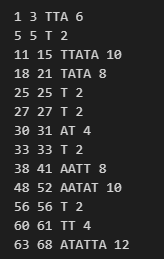

针对3的问题，比如说前面2个序列

In [ ]:
# 算法1：滑动窗口算法，用于查找DNA序列中score值大于阈值0的窗口，并进行合并
def sliding_window_for_MSS(sequence,window_size=1, threshold=0):
    """
    滑动窗口算法，用于查找DNA序列中score值大于阈值0的窗口，并进行合并
    本质上是为了获取maximum-scoring segment（MSS) 
    
    但是这个算法有问题，
    1，首先如果是相邻的，我们可以证明，总分肯定变大——》这个在MSS上只考虑总分的没有问题
    2，如果是重叠overlap的，我们无法确定最后获取的合并序列的总分是变大还是变小还是不变，甚至符号都不能确定——》这个在MSS上只考虑总分的是有问题的，我们可能需要在合并前就对合并前后的得分做出预判，只有当合并后的得分大于合并前的得分才合并，否则不合并
    3，其次对于没有重叠并且没有相邻的窗口，理论上也是存在两个窗口+中间的序列合并在一起之后总分可能会比合并前的任何1个窗口的情况——》比如说上面的例子，最后获取的序列有1-3的TTA以及5的T，然后中间的序列是4的C，那么合并之后的序列是TTACT，总分是6-1+2=7，而合并之前的得分1个是6,1个是2，所以此处没有重叠的窗口在合并之后的得分实际上是比合并前更高了，但是我们的算法实际上并没有捕捉到这个序列模式

    Args:
        sequence (str): DNA序列
        pwindow_size (int): 初始化窗口大小，默认为1
        threshold (float): 需要合并的相邻窗口必须符合的score阈值（下界阈值）,默认为0，也就是2个相邻的窗口只有在score值大于0时才会合并

    Returns:
        list: 合并后的窗口起点和终点列表,即找出的MSS
    """
    
    scores = {'A': 2,'C': -1,'G':-4, 'T': +2}  
    
    MSS = [] #用于保存找到的MSS序列的起点和终点，结果起点终点对保存在列表中
    for i in range(len(sequence) - window_size + 1):
        # 遍历的窗口编号，从0开始  
        window = sequence[i:i + window_size]
        # 获取当前窗口的序列，注意取的是str切片，终点取不到，但是终点-起点+1-1
        win_score = 0
        # 初始化当前窗口的总得分
        for j, base in enumerate(window):
            # enumerate(iterable, start=0)，用于在遍历可迭代对象（如列表、字符串等）时，同时获取元素的索引和值，索引默认从0开始
            # j是索引从0开始，base是碱基字符
            base_score = scores.get(base, 0)
            # 需要计算打分的碱基都在scores字典里，如果不在字典里，返回0
            win_score += base_score
        # 计算窗口内的总得分
        
        
        # 当让此处也可以使用列表推导式，来替代上面的enumerate循环 ！！！
        # win_score = sum([scores.get(base, 0) for base in window])
        
        if win_score > threshold:
            # 窗口内的得分大于阈值，则判定为候选的可用于合并的窗口
            MSS.append((i+1, i + window_size,window,sum([scores.get(base, 0) for base in window])))
            # 该起点终点对保存在MSS列表中，(i+1, i + window_size)保存的数据类型是元组tuple，且是实际1-based的physical位置
            # 同时返回窗口的序列，也就是当前窗口的碱基序列
            # 以及使用列表推导式获取窗口内的总得分，也就是窗口的score值
    
    # 合并重叠的窗口
    merged_MSS = [] # 对窗口进行合并，设置初始化的空列表
    # 用于保存已经合并的窗口起点终点元组对，注意每次比较都是比较当前元组的起点和上一个已经合并的元组对象（也就是merged_MSS[-1]对象)的终点
    
    # 下面是开始合并相邻得分为正的窗口
    if MSS:
        # 如果MSS窗口列表不为空        
        merged_MSS = [MSS[0]] 
        # 将第一个窗口加入merged_MSS列表中，作为后续比对的起点
        for current in MSS[1:]:
            # 遍历MSS列表中的剩余的窗口
            last = merged_MSS[-1]
            # 取出已经合并的窗口的最后一个窗口的元组对
            if current[0] <= last[1]+1:
            # 如果当前窗口与最后一个窗口有重叠，也就是当前窗口的起点小于等于已经合并的最后一个窗口的终点+1（overlap以及相邻）
                merged_MSS[-1] = (last[0],max(last[1],current[1]),sequence[last[0]-1:max(last[1],current[1])],sum([scores.get(base, 0) for base in sequence[last[0]-1:max(last[1],current[1])]]))
                # 更新已经合并的最后一个窗口的终点为当前窗口和已经合并的最后一个窗口的终点的最大值，总之就是更新最后一个窗口，起点不变，终点更新
                # 然后对于此处的序列更新，因为我们只有索引index，所以我们只能从母序列sequence中切片得到子序列，注意切片的起点和终点是1-based的
                
                # 事实上，没有overlap的，比如说是相邻都是正的序列，那肯定最好，因为合并之后的窗口得分更高，但是窗口内的均分难说，因为窗口内的得分是不一样的，会比合并前的任一种score变高或者变低
                
                 
            else:
                merged_MSS.append(current)
                # 如果当前窗口与最后一个窗口没有重叠，直接将当前窗口加入merged_MSS列表中，也就是当前窗口并没有重叠

    # 或者可以直接打印输出，也可以返回，如果要打印输出的话要在return之前
    # for MSS in merged_MSS:
    #    print(MSS[0],MSS[1],MSS[2],MSS[3])
    
    return merged_MSS
    # 返回合并之后的窗口，窗口起点和终点列表，以及对应的序列，且每一个元素是元组，后续需要解包赋值

In [ ]:
merged_MSS = sliding_window_for_MSS(S,window_size=1, threshold=0)
for MSS in merged_MSS:
    print(MSS[0],MSS[1],MSS[2])

1 3 TTA 6
5 5 T 2
11 15 TTATA 10
18 21 TATA 8
25 25 T 2
27 27 T 2
30 31 AT 4
33 33 T 2
38 41 AATT 8
48 52 AATAT 10
56 56 T 2
60 61 TT 4
63 68 ATATTA 12


In [ ]:
# 使用最大得分连续子序列的算法：
library(tidyverse)
x<-read_tsv("/data1/project/ZFP_block/Block/c2h2_zf_PROSITE_entry_name_10_7_v1_1.tsv",col_names=TRUE)
x$charged_block_type

Rows: 3909 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Protein_Name, charged_block_sequence, charged_block_type
dbl (5): charged_block_start, charged_block_end, charged_block_length, charg...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Basic" 
   [9] "Basic"  "Acidic" "Acidic" "Acidic" "Basic"  "Acidic" "Acidic" "Acidic"
  [17] "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic" 
  [25] "Acidic" "Acidic" "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
  [33] "Basic"  "Acidic" "Acidic" "Basic"  "Acidic" "Basic"  "Basic"  "Basic" 
  [41] "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Acidic"
  [49] "Basic"  "Acidic" "Acidic" "Basic"  "Basic"  "Acidic" "Basic"  "Acidic"
  [57] "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
  [65] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
  [73] "Basic"  "Acidic" "Basic"  "Acidic" "Acidic" "Basic"  "Acidic" "Basic" 
  [81] "Basic"  "Acidic" "Basic"  "Acidic" "Acidic" "Basic"  "Basic"  "Acidic"
  [89] "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Acidic" "Basic" 
  [97] "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Acidic" "Basic" 
 [105] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
 [113] "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Acidic"
 [121] "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [129] "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [137] "Basic"  "Basic"  "Acidic" "Basic"  "Acidic" "Acidic" "Basic"  "Basic" 
 [145] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Acidic"
 [153] "Acidic" "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Acidic" "Acidic"
 [161] "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Acidic" "Basic" 
 [169] "Basic"  "Basic"  "Acidic" "Basic"  "Acidic" "Basic"  "Basic"  "Basic" 
 [177] "Acidic" "Acidic" "Acidic" "Acidic" "Acidic" "Basic"  "Acidic" "Basic" 
 [185] "Acidic" "Acidic" "Acidic" "Acidic" "Basic"  "Basic"  "Basic"  "Basic" 
 [193] "Basic"  "Acidic" "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [201] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [209] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic"
 [217] "Basic"  "Basic"  "Basic"  "Acidic" "Acidic" "Acidic" "Basic"  "Basic" 
 [225] "Basic"  "Acidic" "Acidic" "Acidic" "Acidic" "Basic"  "Acidic" "Acidic"
 [233] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [241] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [249] "Basic"  "Basic"  "Acidic" "Acidic" "Basic"  "Basic"  "Basic"  "Basic" 
 [257] "Basic"  "Acidic" "Acidic" "Acidic" "Basic"  "Basic"  "Basic"  "Basic" 
 [265] "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Acidic" "Acidic" "Acidic"
 [273] "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Acidic"
 [281] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic" 
 [289] "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [297] "Basic"  "Acidic" "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic" 
 [305] "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Acidic" "Basic"  "Acidic"
 [313] "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Acidic" "Acidic" "Basic" 
 [321] "Acidic" "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [329] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
 [337] "Acidic" "Acidic" "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
 [345] "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [353] "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [361] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Acidic" "Basic"  "Basic" 
 [369] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [377] "Basic"  "Basic"  "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Acidic"
 [385] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [393] "Acidic" "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "Basic" 
 [401] "Basic"  "Basic"  "Basic"  "Basic"  "Basic"  "

In [ ]:
?read_tsv

read_delim                package:readr                R Documentation

_R_e_a_d _a _d_e_l_i_m_i_t_e_d _f_i_l_e (_i_n_c_l_u_d_i_n_g _C_S_V _a_n_d _T_S_V) _i_n_t_o _a _t_i_b_b_l_e

_D_e_s_c_r_i_p_t_i_o_n:

     ‘read_csv()’ and ‘read_tsv()’ are special cases of the more
     general ‘read_delim()’. They're useful for reading the most common
     types of flat file data, comma separated values and tab separated
     values, respectively. ‘read_csv2()’ uses ; for the field separator
     and , for the decimal point. This format is common in some
     European countries.

_U_s_a_g_e:

     read_delim(
       file,
       delim = NULL,
       quote = "\"",
       escape_backslash = FALSE,
       escape_double = TRUE,
       col_names = TRUE,
       col_types = NULL,
       col_select = NULL,
       id = NULL,
       locale = default_locale(),
       na = c("", "NA"),
       quoted_na = TRUE,
       comment = "",
       trim_ws =

In [ ]:
def max_subarray_with_indices(nums):
    if not nums:
        return 0, [], []
    
    n = len(nums)
    dp = [0] * n
    dp[0] = nums[0]
    max_sum = dp[0]
    
    # 初始化起始和结束位置
    current_start = 0
    global_start = 0
    global_end = 0
    
    for i in range(1, n):
        # 计算 dp[i] 并判断是否选择单独开始
        if nums[i] > dp[i-1] + nums[i]:
            dp[i] = nums[i]
            current_start = i  # 新起点
        else:
            dp[i] = dp[i-1] + nums[i]
        
        # 更新全局最大值及其位置
        if dp[i] > max_sum:
            max_sum = dp[i]
            global_start = current_start
            global_end = i
    
    # 提取子数组
    subarray = nums[global_start : global_end + 1]
    return max_sum, global_start, global_end, subarray

# 示例

scores = {'A': 2,'C': -1,'G':-4, 'T': +2}
S = "TTACTGCGCCTTATAGCTATACGCTGTCGATCTGCGCAATTCCCCCCAATATCCCTCGGTTGATATTAC"
nums = [scores[base] for base in S]
# 通过字典得到每个碱基的得分
result = max_subarray_with_indices(nums)
print(f"最大和: {result[0]}, 起始索引: {result[1]}, 结束索引: {result[2]}, 子数组: {result[3]}")

最大和: 14, 起始索引: 37, 结束索引: 67, 子数组: [2, 2, 2, 2, -1, -1, -1, -1, -1, -1, 2, 2, 2, 2, 2, -1, -1, -1, 2, -1, -4, -4, 2, 2, -4, 2, 2, 2, 2, 2, 2]


In [ ]:
?math.log

In [3]:
import math

# 参数
K = 0.171
m = 600
n = 70.028 * 10**9
λ = 0.304

# 计算 E=1 时的 S 值
S = (math.log(K * m * n)) / λ
print(f"Highest alignment score: {S:.2f}")

Highest alignment score: 97.38


In [8]:
S_bits = S * λ / math.log(2)
print(f"Bits of information: {S_bits:.2f}")

Bits of information: 42.71


In [5]:
math.log2(math.e)

1.4426950408889634

In [9]:
H = 0.587
L = S / H
print(f"Expected length of highest scoring alignment: {L:.2f}")

Expected length of highest scoring alignment: 165.89


In [10]:
import numpy as np

# BLOSUM62矩阵
blosum62 = {
    'A': {'A': 4, 'R': -1, 'N': -2, 'D': -2, 'C': 0, 'Q': -1, 'E': -1, 'G': 0, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -2, 'F': -1, 'P': 1, 'S': 0, 'T': 0, 'W': -4, 'Y': -2, 'V': 0, 'B': -2, 'Z': 0, 'X': 0},
    # 添加其他氨基酸的得分...
}

# 计算H值
def calculate_H(blosum62):
    H = 0
    amino_acids = list(blosum62.keys())
    
    for i in amino_acids:
        for j in amino_acids:
            if i != j:
                s_ij = blosum62[i][j]
                # 假设替换概率p_ij为0.01（这是一个常见的假设，具体值可能需要根据实际情况调整）
                p_ij = 0.01
                H += p_ij * (s_ij ** 2)
    
    return H

H_value = calculate_H(blosum62)
print(f"The H value based on BLOSUM62 matrix is: {H_value}")

The H value based on BLOSUM62 matrix is: 0


In [16]:
import random

def generate_sequence(N, prob_dist):
    """
    根据给定的长度 N 和概率分布生成一个随机序列。
    参数:
    - N: 序列长度。
    - prob_dist: 一个字典，键为碱基，值为其概率，例如 {'A': 0.25, 'C':0.25, 'G':0.25, 'T':0.25}。
    返回:
    - 一个由 A, C, G, T 组成的随机序列字符串。
    """
    bases = list(prob_dist.keys())
    probabilities = list(prob_dist.values())
    sequence = random.choices(bases, weights=probabilities, k=N)
    return ''.join(sequence)

def kadane_algorithm(seq, score_dict):
    """
    使用 Kadane 算法找到 MSS 子序列，并统计其分数、长度和 A 的频率。
    参数:
    - seq: 给定的序列字符串。
    - score_dict: 一个字典，定义每个碱基的分数，例如 {'A':+1, 'C':-1, 'G':-1, 'T':-1}。
    返回:
    - best_sum: MSS 的总得分，如果整个序列全为负，则设定最好分数为0（不选任何子序列）。
    - best_length: MSS 的长度（子序列中字符个数）。
    - best_A_frequency: 在 MSS 子序列中 A 的频率（即 A 数 / MSS 长度），若 MSS 长度为 0 则为 0。
    """
    best_sum = float('-inf')
    current_sum = 0
    start = 0
    best_start, best_end = 0, 0

    for i, char in enumerate(seq):
        current_sum += score_dict[char]
        # 如果当前和比当前字符值还差，则重置起始点
        if current_sum < score_dict[char]:
            current_sum = score_dict[char]
            start = i
        # 更新最佳记录
        if current_sum > best_sum:
            best_sum = current_sum
            best_start = start
            best_end = i
    # 如果所有字符累加起来全为负，则 best_sum 可能还是负，这时可以考虑返回0作为 MSS（即空序列）
    if best_sum < 0:
        return 0, 0, 0
    mss_subseq = seq[best_start:best_end+1]
    best_length = len(mss_subseq)
    count_A = mss_subseq.count('A')
    best_A_frequency = count_A / best_length if best_length > 0 else 0
    return best_sum, best_length, best_A_frequency

def main():
    # 用户输入参数设定
    N = int(input("请输入序列长度 N: "))
    mode = input("请选择概率分布模式（uniform 或 non-uniform）: ").strip().lower()

    if mode == 'uniform':
        prob_dist = {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}
    elif mode == 'non-uniform':
        # 随便举一个符合要求的例子，此处保证每个速度 >= 0.05 且与均匀分布差异至少 0.1
        # 例如 A 与 T 取 0.35，C 与 G 取 0.15
        prob_dist = {'A': 0.35, 'C': 0.15, 'G': 0.15, 'T': 0.35}
    else:
        print("模式输入错误，请输入 'uniform' 或 'non-uniform'.")
        return

    # 定义字符评分
    score_dict = {'A': +1, 'C': -1, 'G': -1, 'T': -1}
    
    iterations = 10000
    total_score = 0
    total_length = 0
    total_A_freq = 0  # 累计A频率的和

    for _ in range(iterations):
        seq = generate_sequence(N, prob_dist)
        score, length, A_freq = kadane_algorithm(seq, score_dict)
        total_score += score
        total_length += length
        total_A_freq += A_freq

    avg_score = total_score / iterations
    avg_length = total_length / iterations
    avg_A_freq = total_A_freq / iterations

    print("\n经过 {} 次模拟结果统计：".format(iterations))
    print("平均 MSS 得分：{:.4f}".format(avg_score))
    print("平均 MSS 长度：{:.4f}".format(avg_length))
    print("平均 MSS 中 A 出现频率：{:.4f}".format(avg_A_freq))

if __name__ == '__main__':
    main()



经过 10000 次模拟结果统计：
平均 MSS 得分：12.1442
平均 MSS 长度：32.4892
平均 MSS 中 A 出现频率：0.7238


In [18]:
import random
import math

def generate_sequence(N, prob_dist):
    """
    根据给定的长度 N 和概率分布生成一个随机序列。
    """
    bases = list(prob_dist.keys())
    probabilities = list(prob_dist.values())
    sequence = random.choices(bases, weights=probabilities, k=N)
    return ''.join(sequence)

def kadane_algorithm(seq, score_dict):
    """
    使用 Kadane 算法找到 MSS 子序列，并统计其分数、长度和 A 的频率。
    """
    best_sum = float('-inf')
    current_sum = 0
    start = 0
    best_start, best_end = 0, 0

    for i, char in enumerate(seq):
        current_sum += score_dict[char]
        if current_sum < score_dict[char]:
            current_sum = score_dict[char]
            start = i
        if current_sum > best_sum:
            best_sum = current_sum
            best_start = start
            best_end = i

    if best_sum < 0:
        return 0, 0, 0
    mss_subseq = seq[best_start:best_end+1]
    best_length = len(mss_subseq)
    count_A = mss_subseq.count('A')
    best_A_frequency = count_A / best_length if best_length > 0 else 0
    return best_sum, best_length, best_A_frequency

def compute_H_and_K(E_S, N, lambda_val):
    """
    根据公式 E = K * N^m * e^(-λS) 计算 H 和 K。
    """
    m = 1  # Assuming m = 1 for simplicity
    H = lambda_val / math.log(2)  # Convert λ to units of nats
    K = E_S / (N ** m * math.exp(-lambda_val * E_S))
    return H, K

def main():
    # 用户输入参数设定
    lengths = [10**2, 10**3, 10**4]
    mode = input("请选择概率分布模式（uniform 或 non-uniform）: ").strip().lower()

    if mode == 'uniform':
        prob_dist = {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}
    elif mode == 'non-uniform':
        prob_dist = {'A': 0.35, 'C': 0.15, 'G': 0.15, 'T': 0.35}
    else:
        print("模式输入错误，请输入 'uniform' 或 'non-uniform'.")
        return

    # 定义字符评分
    score_dict = {'A': +1, 'C': -1, 'G': -1, 'T': -1}
    lambda_val = 0.1  # Example value for λ, can be adjusted

    # 表头
    print(f"{'N':<10}{'E(S)':<10}{'E(L)':<10}{'E(%A)':<10}{'H (nats)':<10}{'K':<10}")

    for N in lengths:
        iterations = 10000
        total_score = 0
        total_length = 0
        total_A_freq = 0

        for _ in range(iterations):
            seq = generate_sequence(N, prob_dist)
            score, length, A_freq = kadane_algorithm(seq, score_dict)
            total_score += score
            total_length += length
            total_A_freq += A_freq

        avg_score = total_score / iterations
        avg_length = total_length / iterations
        avg_A_freq = total_A_freq / iterations

        # 计算 H 和 K
        H, K = compute_H_and_K(avg_score, N, lambda_val)

        # 打印结果
        print(f"{N:<10}{avg_score:<10.3f}{avg_length:<10.3f}{avg_A_freq:<10.3f}{H:<10.2f}{K:<10.2f}")

if __name__ == '__main__':
    main()

N         E(S)      E(L)      E(%A)     H (nats)  K         
100       4.897     9.652     0.828     0.14      0.08      
1000      8.430     20.622    0.757     0.14      0.02      
10000     12.139    32.523    0.724     0.14      0.00      


In [ ]:
def sliding_window_for_charged_block(sequence, window_size=10, threshold=5):
    """
    滑动窗口算法，用于查找蛋白质序列中NCPR绝对值大于阈值的窗口，并合并重叠的窗口，
    并对合并后的所有窗口序列进行最大连续子序列和的分析。
    """
    charges = {'R': 1, 'K': 1, 'H': 1, 'E': -1, 'D': -1, 'S': 0, 'T': 0}
    results_acidic = []
    results_basic = []

    for i in range(len(sequence) - window_size + 1):
        window = sequence[i:i + window_size]
        total_charge = sum([charges.get(aa, 0) for aa in window])
        if abs(total_charge) >= threshold:
            if total_charge > 0:
                results_basic.append((i + 1, i + window_size, window_size, window, total_charge, total_charge / len(window)))
            else:
                results_acidic.append((i + 1, i + window_size, window_size, window, total_charge, total_charge / len(window)))

    def merge_and_analyze(results):
        merged_results = []
        if results:
            merged_results = [results[0]]
            for current in results[1:]:
                last = merged_results[-1]
                if current[0] <= last[1] + 1:
                    merged_sequence = sequence[last[0] - 1:max(last[1], current[1])]
                    total_charges = sum(charges.get(base, 0) for base in merged_sequence)
                    ncpr = total_charges / len(merged_sequence) if len(merged_sequence) > 0 else 0
                    merged_results[-1] = (last[0], max(last[1], current[1]), len(merged_sequence), merged_sequence, total_charges, ncpr)
                else:
                    merged_results.append(current)

            # 对每个合并后的窗口进行最大连续子序列分析
            analyzed_results = []
            for start, end, length, seq, total_charge, ncpr in merged_results:
                charge_array = [charges.get(aa, 0) for aa in seq]
                max_sum, sub_start, sub_end, subarray = max_subarray_with_indices(charge_array)
                sub_start_global = start + sub_start
                sub_end_global = start + sub_end
                sub_ncpr = sum(subarray) / len(subarray) if len(subarray) > 0 else 0
                analyzed_results.append((sub_start_global, sub_end_global, len(subarray), ''.join(seq[sub_start:sub_end + 1]), sum(subarray), sub_ncpr))
            return analyzed_results
        return merged_results

    merged_results_acidic = merge_and_analyze(results_acidic)
    merged_results_basic = merge_and_analyze(results_basic)

    return merged_results_acidic, merged_results_basic

In [ ]:
94.37+113.90